# Communities and Crime

## Notebook Setup and Loading Data

In [50]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [51]:
df = pd.read_csv('communities.data')
with open('communities.names', 'r') as file:
    file_contents = file.read()

print(file_contents)

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

In [52]:
df.head(5)
#No headers. Nothing to identify the data

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.0,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.0,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.0,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.0,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.0,?,0.14


#### Assigning Column Names to Communities Dataset

In [53]:
#Function to extract column names from the communities.names file

def extract_column_names(filename):
    """
    Extracts column names from a file where each column name is prefixed with '@attribute'
    """
    column_names = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('@attribute'):
                # Extract the attribute name
                parts = line.split()
                if len(parts) > 1:
                    column_name = parts[1]
                    column_names.append(column_name)
    return column_names

column_names = extract_column_names('communities.names')

df.columns = column_names
                                    

In [54]:
df.head(5)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.0,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.0,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.0,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.0,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.0,?,0.14


#### Cleaning Data

In [55]:
#Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

In [56]:
df.dtypes

state                    int64
county                  object
community               object
communityname           object
fold                     int64
                        ...   
LemasPctPolicOnPatr     object
LemasGangUnitDeploy     object
LemasPctOfficDrugUn    float64
PolicBudgPerPop         object
ViolentCrimesPerPop    float64
Length: 128, dtype: object

In [57]:
#Converting data types specified in communities.names file under "Attribute Information" section 
# List of columns not to convert
columns_not_to_convert = ['state', 'county', 'community', 'communityname', 'fold','LemasGangUnitDeploy']

# Converting all other columns to float64 so can be used for analysis 
for column in df.columns:
    if column not in columns_not_to_convert:
        df[column] = df[column].astype(float)

In [58]:
#No duplicates
duplicate_rows = df.duplicated()
df[duplicate_rows]

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop


In [59]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

#Drop columns with a high number of missing values
high_missing_cols = missing_values[missing_values > 1000].index
df_cleaned = df.drop(columns=high_missing_cols)

In [60]:
# For the column with only one missing value, fill it with the median
median_imputer = SimpleImputer(strategy='median')
df_cleaned['OtherPerCap'] = median_imputer.fit_transform(df_cleaned[['OtherPerCap']])

# Check for any categorical columns remaining
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Since 'communityname' is a categorical column that likely has a high cardinality, 
# it might not be useful for the model, so we drop it.
df_cleaned.drop(columns=categorical_cols, inplace=True)

# Split the data into features and target
X = df_cleaned.drop('ViolentCrimesPerPop', axis=1)
y = df_cleaned['ViolentCrimesPerPop']

#Show list of features, Target = ViolentCrimesPerPop'
feature_names = X.columns.tolist()
feature_names

['state',
 'fold',
 'population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmi

#### Create Train/Test Splits From Cleaned Data

In [61]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output the shape of the resulting dataframes
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((1594, 102), (399, 102), (1594,), (399,))

## Exploratory Data Analysis

#### General Statistical Information

In [29]:
#Look at basic stats for each column used for prediction. Excludes columns that are only descriptive
df.drop(columns=['state', 'fold']).describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,318.000000,1993.000000,1993.000000,1993.000000,318.000000,318.000000,318.000000,1993.000000,318.000000,1993.000000
mean,0.057526,0.463462,0.179709,0.753643,0.153698,0.144009,0.424260,0.493879,0.336287,0.423216,...,0.306038,0.065203,0.232840,0.161666,0.163428,0.076824,0.697956,0.093939,0.195252,0.237998
std,0.126903,0.163731,0.253480,0.244079,0.208929,0.232549,0.155223,0.143599,0.166543,0.179216,...,0.227240,0.109480,0.203142,0.229111,0.215038,0.140413,0.213981,0.240335,0.164948,0.233042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.140000,0.020000,0.100000,0.020000,0.040000,0.020000,0.620000,0.000000,0.110000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.260000,0.040000,0.170000,0.070000,0.080000,0.030000,0.750000,0.000000,0.155000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.397500,0.070000,0.280000,0.190000,0.197500,0.060000,0.840000,0.000000,0.220000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


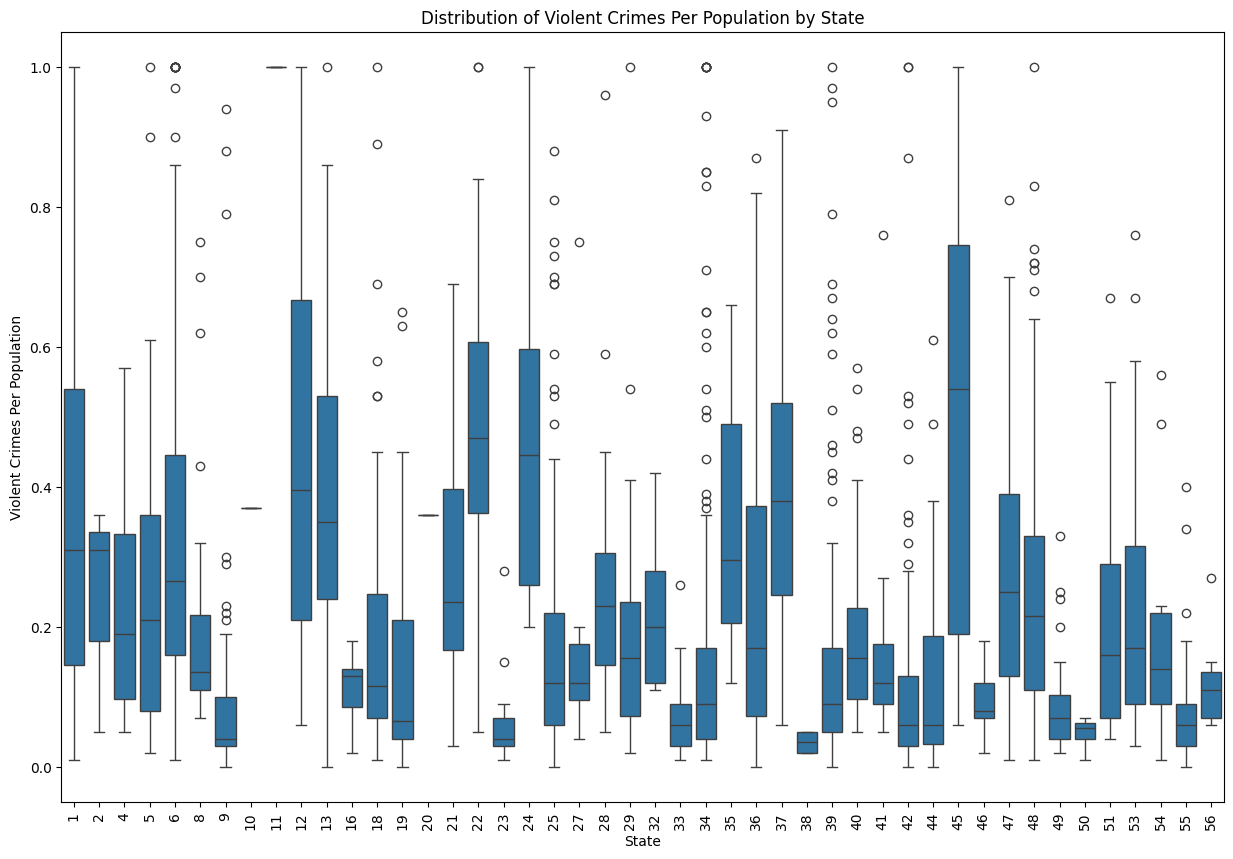

In [34]:
#Create a boxplot to look at distrubtion of violent crime for each state

plt.figure(figsize=(15, 10))  # Adjust the size of the plot as needed
sns.boxplot(x='state', y='ViolentCrimesPerPop', data=df)

plt.xlabel('State')
plt.ylabel('Violent Crimes Per Population')
plt.title('Distribution of Violent Crimes Per Population by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [37]:
#Data seems to skip some states. Maybe uses territories. Otherwise unsure why states go up to 56
unique_states = df['state'].unique()
print(sorted(unique_states))

[1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56]


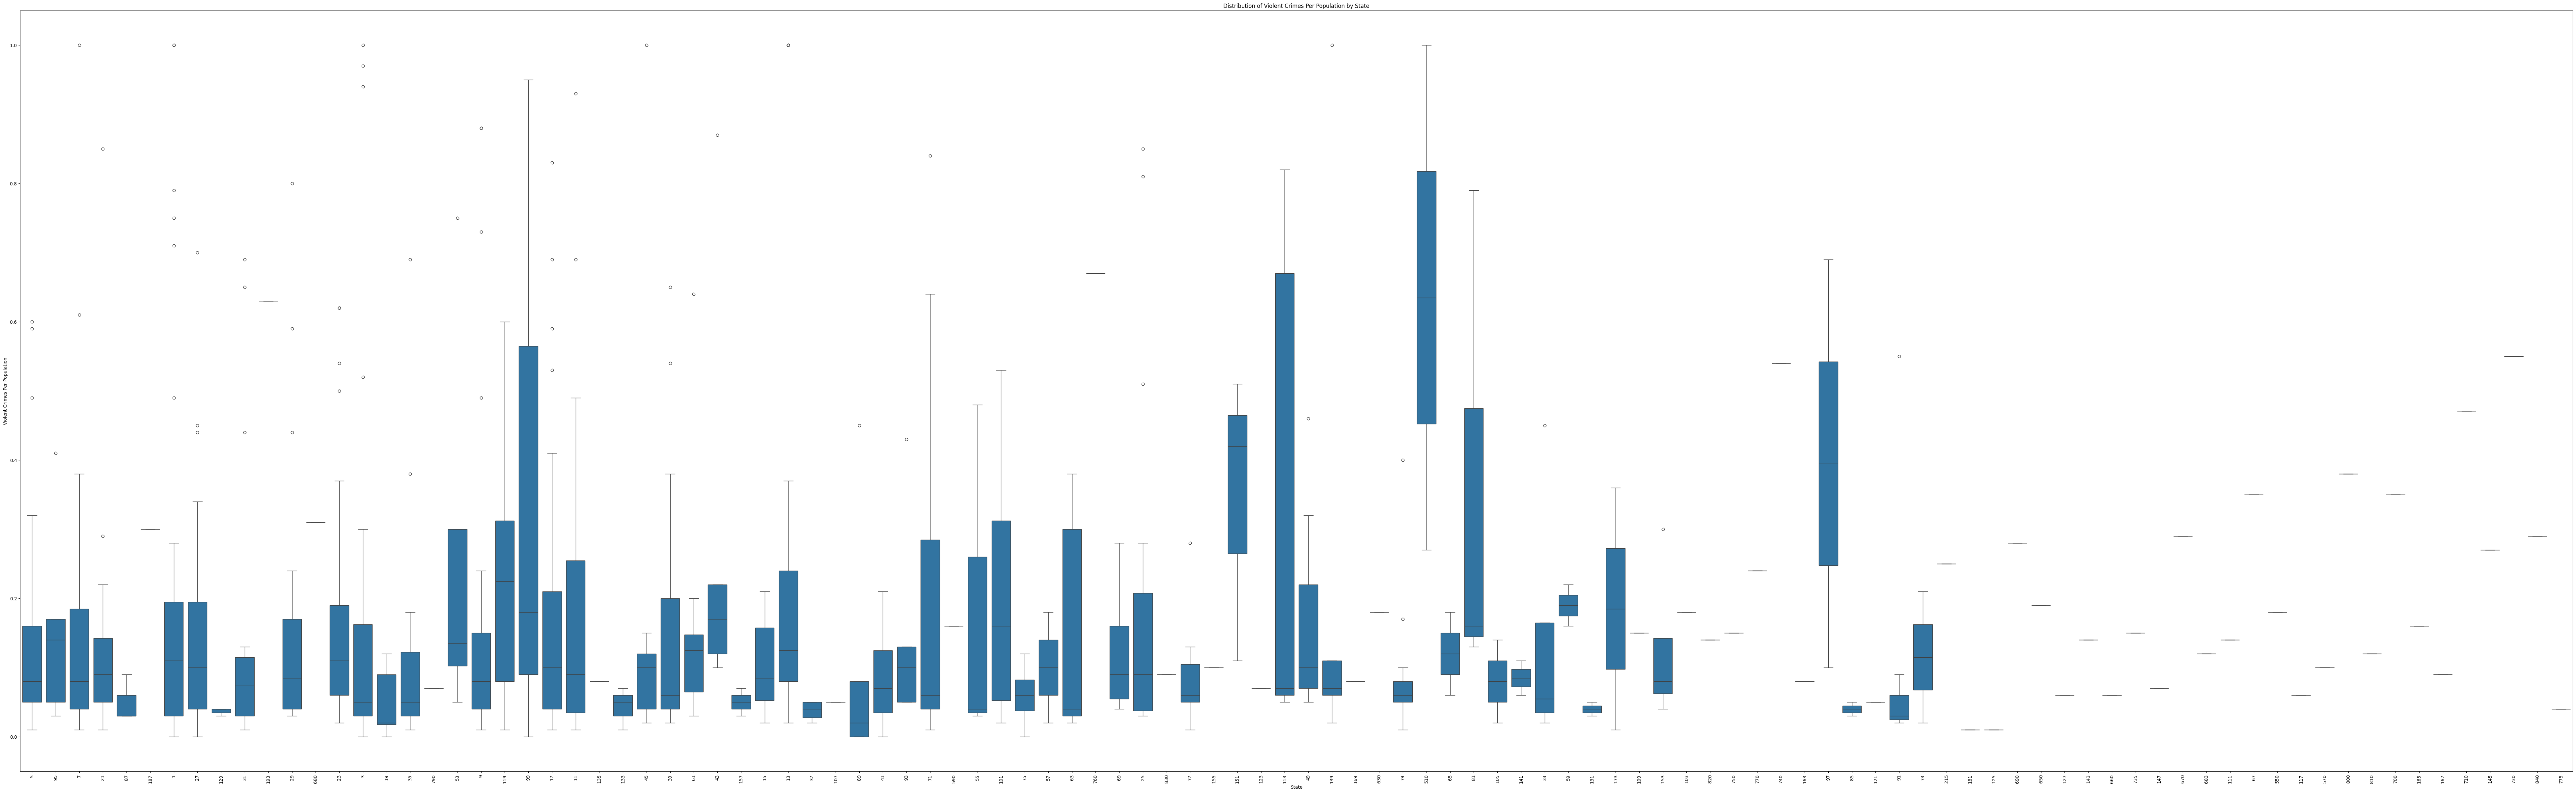

In [42]:
#Create a boxplot to look at distrubtion of violent crime for each county.
#Needs tinkering to plot size and label size to better visualize the data. 

plt.figure(figsize=(100, 30))  # Adjust the size of the plot as needed
sns.boxplot(x='county', y='ViolentCrimesPerPop', data=df)

plt.xlabel('State')
plt.ylabel('Violent Crimes Per Population')
plt.title('Distribution of Violent Crimes Per Population by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Regression

In [62]:
#Generate correlation coefficients between all variables and violent crime

# Select only columns of float64 type. Will only use non descriptive data.
float_columns = df.select_dtypes(include=['float64'])

correlation_matrix = float_columns.corr()

# Extract correlations with 'ViolentCrimesPerPop'
violent_crimes_correlation = correlation_matrix['ViolentCrimesPerPop']

print(violent_crimes_correlation)

population             0.367346
householdsize         -0.034995
racepctblack           0.631279
racePctWhite          -0.684787
racePctAsian           0.037609
                         ...   
PolicOperBudg          0.337912
LemasPctPolicOnPatr   -0.079933
LemasPctOfficDrugUn    0.348784
PolicBudgPerPop        0.095172
ViolentCrimesPerPop    1.000000
Name: ViolentCrimesPerPop, Length: 122, dtype: float64


In [63]:
# Sort the correlations based on their absolute values in order of strongest correlations
# Need to drop ViolentCrimesPerPop
violent_crimes_correlation.abs().sort_values(ascending=False)

ViolentCrimesPerPop    1.000000
PctKids2Par            0.738445
PctIlleg               0.737965
PctFam2Par             0.706713
racePctWhite           0.684787
                         ...   
householdsize          0.034995
PolicAveOTWorked       0.033476
PctWorkMomYoungKids    0.022431
PctVacMore6Mos         0.021212
PctSameState85         0.019464
Name: ViolentCrimesPerPop, Length: 122, dtype: float64

#### Linear Regression (OLS)

In [64]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression 

model = LinearRegression() 
model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f}".format(r2,me))

# My initial attempt to explain the results: 
# R-squared of 0.657 indicates that the model explains about 65.7% of the variance in 'ViolentCrimesPerPop', indicating a moderate to good fit. 
#The Mean Squared Error of 0.019 suggests the model's predictions are relatively close to actual values, indicating a good fit.

r2=0.657 MSE=0.019


##### L2 and L1 Regularization for Ridge (L2) and Lasso (L1) Regression

In [76]:
# L2 and L1 Regularization 
alphas = np.logspace(-10, 0, 200)

### Ridge Regression

In [67]:
from sklearn.linear_model import RidgeCV 

model = RidgeCV(alphas=alphas) 
model.fit(X_train, y_train)

yhat = model.predict(X_test)

r2 = r2_score(y_test, yhat)
me = mse(y_test, yhat)

print("r2={:0.3f} MSE={:0.3f} alpha={:0.3f}".format(r2,me, model.alpha_))

# My initial attempt to explain the results: 
# #Alpha of 1.000 shows a good balance between complexity and prediction accuracy, #explaining 66.4% of the variance and achieving a low mean squared error of 0.018, indicating effective predictive performance.

r2=0.664 MSE=0.018 alpha=1.000


#### Seaborn Box and Whisker plots

<Axes: ylabel='ViolentCrimesPerPop'>

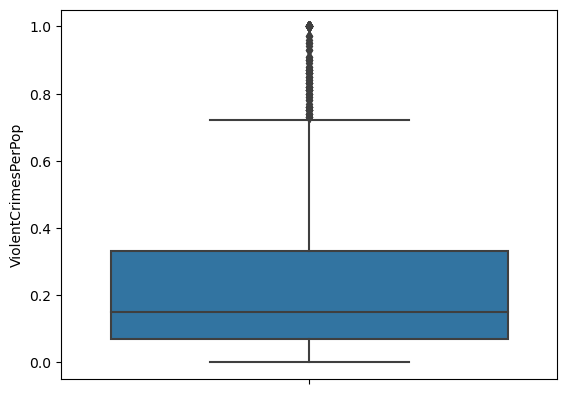

In [70]:
sns.boxplot(y=target, data=df)

# My initial attempt to explain the results: 
# Boxplot shows the 'ViolentCrimesPerPop' distribution, with a median of 0.2 and the middle 50% of data between the 25th and 75th percentiles.
# Outliers are present above the upper whisker, suggesting a right-skewed distribution?